# Мини задание 2

В этой домашней работе будет два подзадания.

Мы продолжает работать с датасетом из Авито - https://www.kaggle.com/c/avito-context-ad-clicks .

**1. [+6 баллов]** В `VisitsStream.tsv` лежит информация про пользователей, которые открывают сайт. Используя классический Hadoop MapReduce необходимо посчитать топ 10 пользователей с самыми длинными по времени сессиями и время этой самой длинной сессии (в секундах).

Сессия определяется следующим образом - это окно времени, внутри которого временное расстояние от двух соседних посещений не более **15 минут**. 

Иными словами - если пользователь зашел на сайт в момент X и последнее предыдущее посещение сайта в момент Y было не позднее чем 15 минут назад, то сессия "продлевается" до текущего момента. Если же временное расстояние от X до Y более 15 минут, то считается, что предыдущая сессия закончилась в момент Y, а новая сессия началась в момент X.

Сессия может длится 0 секунд, если пользователь сделал всего 1 запрос в течение 30 минутного окна (в середине этого окна). Считается, что в начале у пользователя нет открытой сессии и что сессия автоматически заканчивается, когда записей больше не осталось.

Выводить нужно только уникальных пользователей и для каждого такого пользователя находить время самой длинной его сессии. 

При решении можно использовать произвольное количество MapReduce задач, но чем меньше, тем лучше. За излишне неоптимальное решение можно потерять балл. 

Полученный файл с топ 10 нужно будет выложить в облако, обеспечить публичный доступ до него и приложить к решению.

В ноутбуке должны присутствовать ячейки с 

1) Всеми необходимыми скриптами для работы ваших MapReduce задач

2) Командами запуска самих MapReduce задач

3) Ссылкой на итоговый результат работы в вашем облаке. Ссылки должны быть рабочими до того момента, как вашу домашку не проверят.

Пример итогового файла

```bash
1000094	6852
1000030	4237
1000003	1932
1000058	1885
100010	1132
1000012	1086
1000067	657
1000111	244
1000085	197
1000049	131
```

**2. [+4 балла]** В этой секции будем работать с большим количеством таблиц, которые есть в датасете. Подробное описание данных в этих таблицах и их взаимосвязей есть на странице Kaggle - https://www.kaggle.com/c/avito-context-ad-clicks/data

Схема данных следующая 

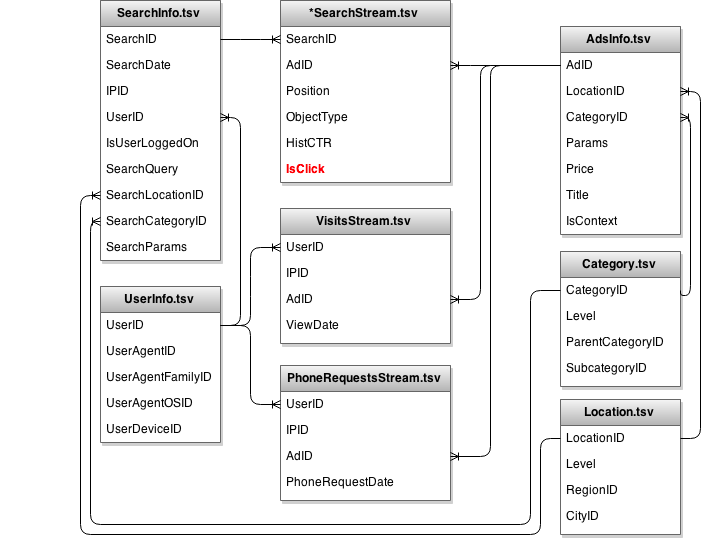

Для данных нужно подсчитать некоторые статистики.

*1. [1 балл]* Найдите топ 10 самых встречаемых слов в запросах, в которых пользователь кликнул по рекламе. Слова должны быть приведены к нижнеу регистру. 

Для примера

```bash
"Купить стол" -> Кликнул
"Ноутбук" -> Кликнул
"Купить машину" -> Кликнул
"Красивый стол" -> Не кликнул
"Большой стол" -> Кликнул
"Купить маску" -> Кликнул
```

Топ слов (с указанием того, сколько раз оно встретилось)

```bash
купить - 3
стол - 2
ноутбук - 1
большой - 1
маску - 1
машину - 1
```

*2 [1 балл]* Найдите всех пользователей, которые заходили каждый день на протяжении всего времени измерений. В качестве ответа запишите одно число - количество этих пользвателей.

*3 [1 балл]* Для каждого дня найдите количество уникальных пользователей, которые заходили на сайт в этот день. Выкиньте из рассмотрения всех пользователей, которых вы нашли в пункте 3 (то есть тех, которые заходили каждый день на протяжении всего времени измерений). 

В ответе укажите пары день-число уникальных пользователей в порядке убывания количества.

*4 [1 балл]* Найдите топ-10 самых скоррелированных между собой `UserAgentOSID` и `CategoryID` в поисковых запросах. 

В данном контексте корреляция - это корреляция Пирсона между случайной величиной `UserAgentOSID_X` = `Indicator{UserAgentOSID == X}` и `CategoryID_Y` = `Indicator{CategoryID == Y}`. 

Полезные ссылки - <a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F#%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8">1</a>, <a href="https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)">2</a>.

В ответе укажите 10 троек UserAgentOSID, CategoryID, Correlation в порядке убывания корреляции.

**Важно!** Результаты каждого из 4 пунктов сохраните в виде файла в облачное хранилище. Ссылки на все 4 файла должны быть указаны в работе. 

Итого, в ноутбуке должны присутствовать 

1) Ячейки с кодом на Spark

2) Ссылки на все файлы в облаке

**Важно!** Следите за объемом потребляемой памяти! За решения, которые работают не оптимально по памяти, можно терять баллы. Понятное дело, что на текущих объемах скорее всего сработает примерно любое решение, но это не повод плохо писать алгоритм.

Если в вашем алгоритме есть спорный момент в отношении использования памяти, но вы сделали это намерено - напишите явно в комментарии, что это осознаное решение, которое вы приняли по такой-то причине. Например вы могли запустить отдельную MR\Spark задачу, которая бы показала, что во всем датасете определенного типа данных не более чем `M`, а значит мы не упремся в ограничения по памяти и вполне уместно использовать для его обработки именно такой подход.

Если результат работы вашего алгоритма "размазался" по нескольким файлам, то нужно дополнительно склеить их в один файл.

<img src="https://raw.githubusercontent.com/ADKosm/lsml-2023-public/main/data/bonus.png" width=100\>

**Дополнительные баллы за обученную модель!**

Для вас подготовленно небольшое соревнование на Kaggle - https://www.kaggle.com/t/8930bc06b5ab4dc09767fd11bede5db6 .

В этом соревновании вам нужно решить старую классическую задачу старым классическим методом. А именно у вас есть ревью, которые оставляли пользователи на сайте интернет-магазина. Некоторые из них нормальные, некоторые -  спам. Вам нужно обучить **Наивный байесовский классификатор** для классификации таких ревью. 

Полезные ссылки: <a href="http://bazhenov.me/blog/2012/06/11/naive-bayes.html">1</a>

Вам нужно побить бейзлайн - 0.85840 по метрике F-score. Оценка будет по приватному скору, бейзлайн на публичном - 0.85867.

**Note:** Использовать готовые библиотеки для машинного обучения на спарке **нельзя** - все нужно писать смоими руками. Когда будете программировать модель, не забудьте про деление на ноль, проблему перемножения большого количества маленьких чисел и стоп-слова! 

Ответом являются
- Код на Spark, который обучает модель
- Посылка в kaggle - пришлите ваш никнейм на kaggle, мы посмотрим на ваш скор.

За обученную модель, которая побила бейзлайн вы получаете **+3** балла!